# 🏫 Project: Exploring NYC Public School Test Result Scores
## Summary
This is a featured project in Datacamp's Data Science Career Track. 

In this project, we will analyze 23-24 SAT scores from New York City public high schools and compare math, reading, and writing scores across schools and boroughs.

## Background
Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

You have been provided with a dataset called schools.csv, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

# Objectives
The main goals of this project are to:

* Manipulate data using Python programming.
* Create a data visualization. A line chart is included in the final submission of this project.
* Interpret and prepare a write up describing the key takeaways and trends in SAT scores across NYC public high schools.

# Preparing the Environment
We will import the required libraries and read the data set.

Pandas - Data manipulation
Numpy - Data arrays
Matplotlib  - Data visualization



In [ ]:
!pip3 install pandas numpy matplotlib --quiet

In [12]:
# Necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# Read in the data
schools = pd.read_csv("schools.csv")

## Exploring Data Set
Let's have a look at the data using df.head(), df.info() and df.describe().

In [4]:
# Preview first 5 rows of data set
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [5]:
# Summary of school table
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [16]:
# Descriptive Statistics summary
schools.describe()

schools.isnull().sum()
# Drop the NULL values
schools = schools.dropna()

# Reset index after dropping NULL values
schools = schools.reset_index(drop=True)

# Confirm that NULL values have been dropped from data set
schools.isnull().sum()

school_name        0
borough            0
building_code      0
average_math       0
average_reading    0
average_writing    0
percent_tested     0
dtype: int64

## Question 1. Which NYC schools have the best math results? 
* The best math results are at least 80% of the *maximum possible score of 800* for math.

In [17]:
# NYC schools with at least 80% of 800 score. Filter schools with average_math >= 640
best_math_schools = schools[schools["average_math"] >= 640][["school_name", "average_math"]]

# Sort by average_math (descending)
best_math_schools = best_math_schools.sort_values("average_math", ascending=False)

print(best_math_schools)

                                           school_name  average_math
83                              Stuyvesant High School           754
161                       Bronx High School of Science           714
88                 Staten Island Technical High School           711
345  Queens High School for the Sciences at York Co...           701
64   High School for Mathematics, Science, and Engi...           683
265                     Brooklyn Technical High School           682
315                        Townsend Harris High School           680
164  High School of American Studies at Lehman College           669
42                       Eleanor Roosevelt High School           641


## Question 2. What are the top 10 performing schools based on the combined SAT scores?

In [18]:
# Top 10 performing schools based on combined SAT scores

# Create total_SAT column
schools["total_SAT"] = (
    schools["average_math"] +
    schools["average_reading"] +
    schools["average_writing"]
)

top_10_schools = (
    schools[["school_name", "total_SAT"]]
    .sort_values("total_SAT", ascending=False)
    .head(10)
)

print(top_10_schools)

                                           school_name  total_SAT
83                              Stuyvesant High School       2144
161                       Bronx High School of Science       2041
88                 Staten Island Technical High School       2041
164  High School of American Studies at Lehman College       2013
315                        Townsend Harris High School       1981
345  Queens High School for the Sciences at York Co...       1947
4                       Bard High School Early College       1914
265                     Brooklyn Technical High School       1896
42                       Eleanor Roosevelt High School       1889
64   High School for Mathematics, Science, and Engi...       1889


# Question 3. Which single borough has the largest standard deviation in the combined SAT score?

In [19]:
# Group by borough and compute required stats
borough_stats = schools.groupby("borough").agg(
    num_schools=("total_SAT", "count"),
    average_SAT=("total_SAT", "mean"),
    std_SAT=("total_SAT", "std")
)

# Find borough with the largest standard deviation
largest_std_dev = borough_stats.nlargest(1, "std_SAT").reset_index()

# Round numeric columns to 2 decimals
largest_std_dev = largest_std_dev.round(2)


print(largest_std_dev)

         borough  num_schools  average_SAT  std_SAT
0  Staten Island            9      1438.22   235.77


## Further Exploration 
1. What are the differences between the top 10 schools and the bottom 10 ?
2. Which group is closer to the overall average?
3. What does the distribution look like?

In [20]:
# Top 10 schools
top_10 = schools.nlargest(10, "total_SAT")

# Bottom 10 schools
bottom_10 = schools.nsmallest(10, "total_SAT")

# Compute standard deviations
std_top_10 = top_10["total_SAT"].std()
std_bottom_10 = bottom_10["total_SAT"].std()

comparison = pd.DataFrame({
    "group": ["Top 10 Schools", "Bottom 10 Schools"],
    "std_deviation": [std_top_10, std_bottom_10]
})

# Round to two decimals
comparison = comparison.round(2)

print(comparison)


               group  std_deviation
0     Top 10 Schools          84.52
1  Bottom 10 Schools          38.98


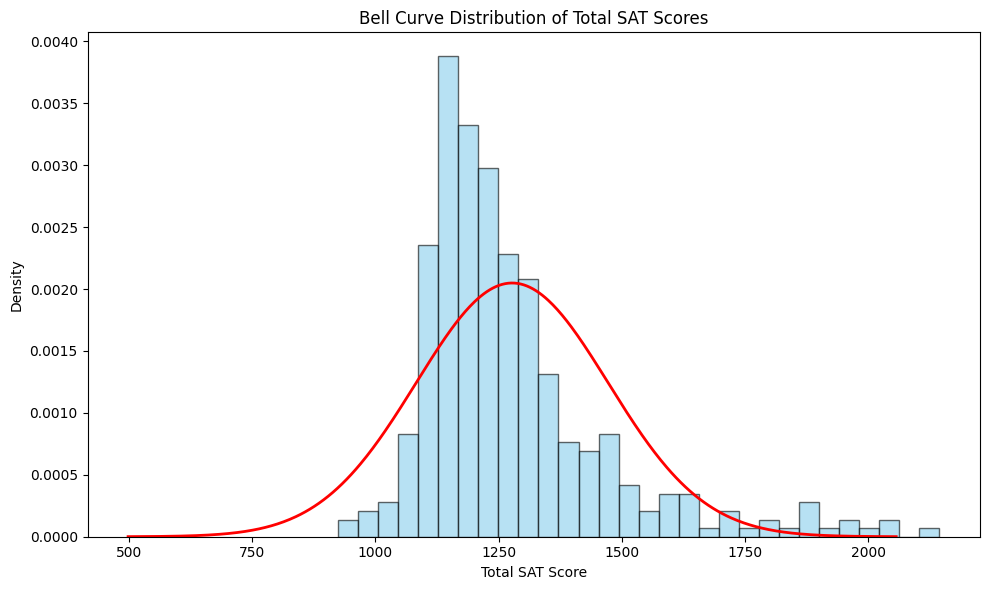

In [22]:
mu = np.mean(schools["total_SAT"])
sigma = np.std(schools["total_SAT"])

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
bell_curve = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
data = schools["total_SAT"].dropna()

# # Plot histogram + bell curve
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.plot(x, bell_curve, color='red', linewidth=2)
plt.xlabel("Total SAT Score")
plt.ylabel("Density")
plt.title("Bell Curve Distribution of Total SAT Scores")
plt.tight_layout()
plt.show()

## Conclusion

In Summary, it appears NYC public schools SAT scores vary quite a bit: 
The distribution is not perfectly normal — it is right-skewed. The long tail on the right side of the curve (higher SAT scores) shows a cluster of schools around the middle (roughly 1150–1350). Because of the right tail, the mean is slightly higher than the median. This is common in educational performance data (a handful of selective schools pulling the average up). The tallest bars tell us that most NYC high schools have mid-range total SAT scores. There is a small number of schools with very high SAT scores (1500–2100). These "outliers" above 1500—and a few as high as ~2000+—suggest specialized or selective schools (science/tech, gifted programs) outperform by quite a bit. Conversly, the data also shows that there are less extreme low-performing schools which suggests that expected supports/interventions may be raising the bottom or that extremely low-performing schools aren’t included in this dataset. In conclusion, NYC schools scores vary noticeably but not wildly, except for the top performers.

* Some schools significantly outperform others, but very few drastically underperform. This indicates positive skewness.
* The mean is somewhat dragged upward by high-performing schools and therefore, the citywide average overstates typical school performance.
* Most schools cluster tightly in the 1100–1400 range
* Most schools perform “normally,” within a fairly predictable band.
* NYC has a small, elite subgroup of extremely high-performing schools.
